# Libraries

In [1]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np
import warnings
import os

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

# 🔧 Basic functions
def snake_columns(data):
    """
    Standarize and returns snake_case columns
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]

# Data Extraction & Copy

In [2]:
os.listdir()

['.config', 'king_ country_ houses_aa.csv.zip', 'sample_data']

In [3]:
data = pd.read_csv('king_ country_ houses_aa.csv.zip')

In [4]:
df = data.copy()

In [5]:
snake_columns(df)

# Project Overview & Columns

**Project Overview:** This project features a dataset of house sale prices in King County, including Seattle, from **May 2014 to May 2015**.
It simulates real-world real estate analysis, promoting collaborative problem-solving and practical application of Python in real estate finance.


---



- **`id`**: A unique identifier for a house.
- **`date`**: The date on which the house was sold.
- **`price`**: The sale price of the house (prediction target).
- **`bedrooms`**: Number of bedrooms in the house.
- **`bathrooms`**: Number of bathrooms in the house, per bedroom.
- **`sqft_living`**: Square footage of the interior living space.
- **`sqft_lot`**: Square footage of the land space.
- **`floors`**: Number of floors (levels) in the house.
- **`waterfront`**: Whether the house has a waterfront view.
- **`view`**: Number of times the house has been viewed.
- **`condition`**: The overall condition of the house.
- **`grade`**: The overall grade given to the house, based on the King County grading system.
- **`sqft_above`**: Square footage of the house apart from the basement.
- **`sqft_basement`**: Square footage of the basement.
- **`yr_built`**: The year the house was built.
- **`yr_renovated`**: The year the house was renovated.
- **`zipcode`**: ZIP code area.
- **`lat`**: Latitude coordinate.
- **`long`**: Longitude coordinate.
- **`sqft_living15`**: The interior living space for the nearest 15 neighbors in 2015.
- **`sqft_lot15`**: The land spaces for the nearest 15 neighbors in 2015.

**TARGET** --> **`Price`**: Our primary **focus/goal is to understand which features most significantly impact the house price**. Additionally, we aim to explore properties valued at $650K and above for more detailed insights.


---



# Data Exploration

In [6]:
df.shape

(21613, 21)

In [7]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Data Insights

Price Bining:

# Data Cleaning

## Index, Date and Duplicates

In [8]:
# Setting [id] as index:
df.set_index('id', inplace=True)

In [9]:
# Changing [date] to 'datetime':
df.date = pd.to_datetime(df.date)

In [10]:
# Drop duplicates:
df = df.drop_duplicates()

In [11]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## Moving Traget `Price` to the right

In [12]:
target = df.pop('price')

In [13]:
df['price'] = target

## Dealing Null/Empty Values

In [14]:
df.isna().sum() #We have no ´null´values

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [15]:
df.eq(" ").sum() #No empty spaces

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

# EDA (Exploratory Data Analysis)

In [16]:
# Check unique values:
df.nunique()

date              372
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
price            4028
dtype: int64

In [17]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,21613,2014-10-29 04:38:01.959931648,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
bedrooms,21613.0,3.370842,0.0,3.0,3.0,4.0,33.0,0.930062
bathrooms,21613.0,2.114757,0.0,1.75,2.25,2.5,8.0,0.770163
sqft_living,21613.0,2079.899736,290.0,1427.0,1910.0,2550.0,13540.0,918.440897
sqft_lot,21613.0,15106.967566,520.0,5040.0,7618.0,10688.0,1651359.0,41420.511515
floors,21613.0,1.494309,1.0,1.0,1.5,2.0,3.5,0.539989
waterfront,21613.0,0.007542,0.0,0.0,0.0,0.0,1.0,0.086517
view,21613.0,0.234303,0.0,0.0,0.0,0.0,4.0,0.766318
condition,21613.0,3.40943,1.0,3.0,3.0,4.0,5.0,0.650743
grade,21613.0,7.656873,1.0,7.0,7.0,8.0,13.0,1.175459


## Visual Data Distribution

### All columns

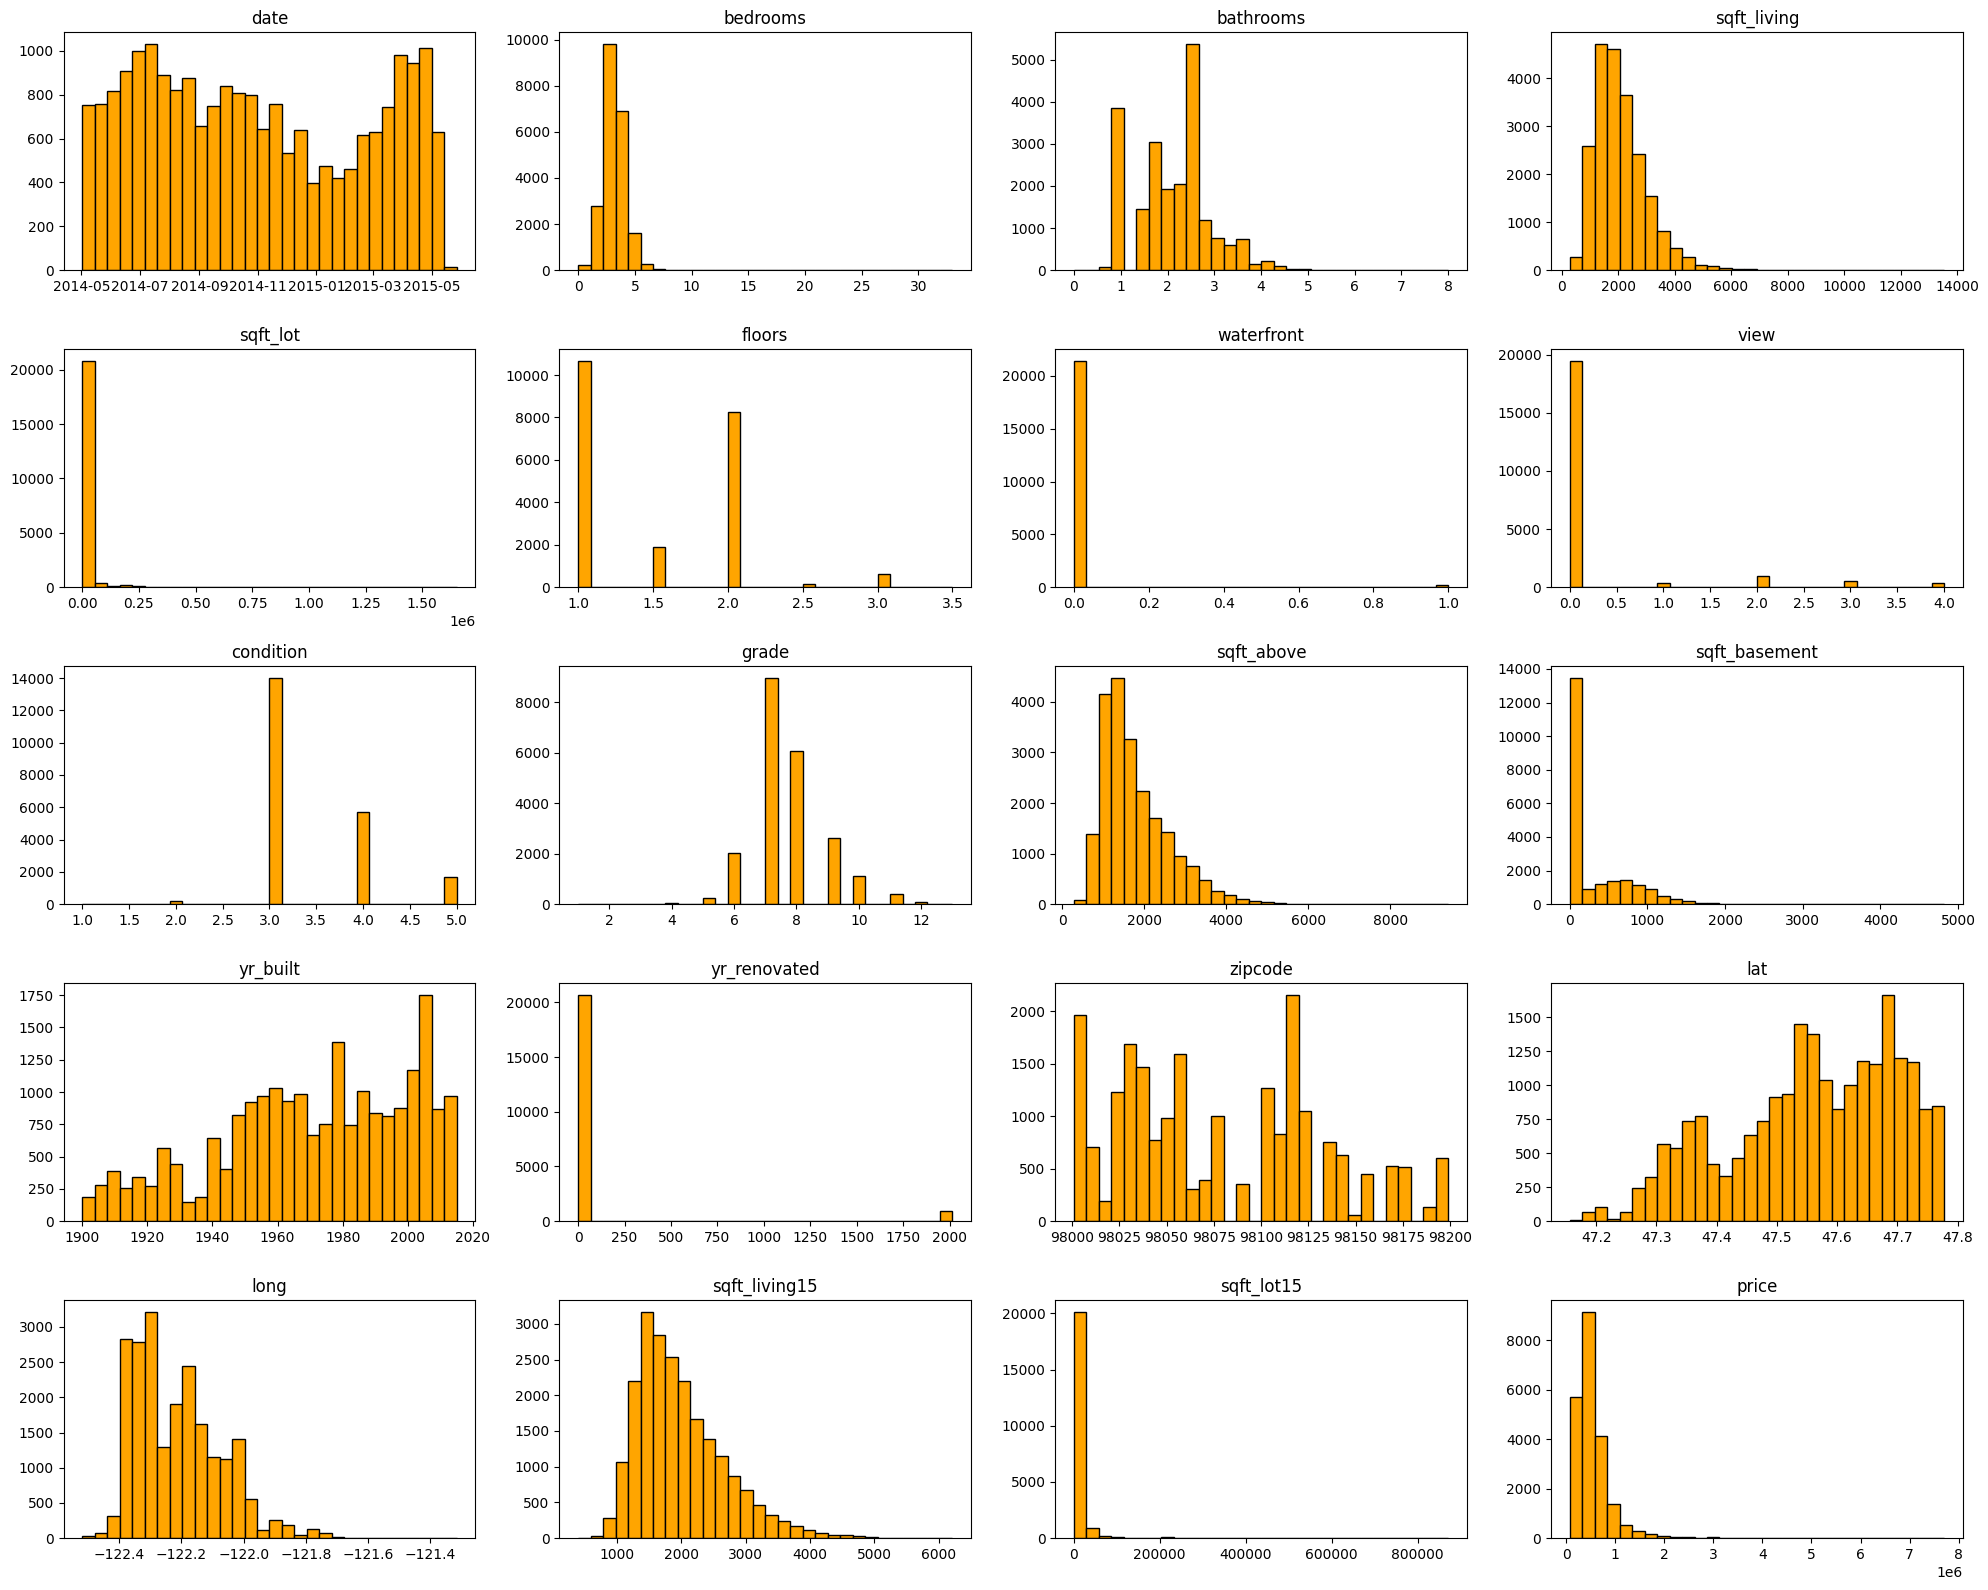

In [18]:
# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color='orange', edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

### Target (`price`)

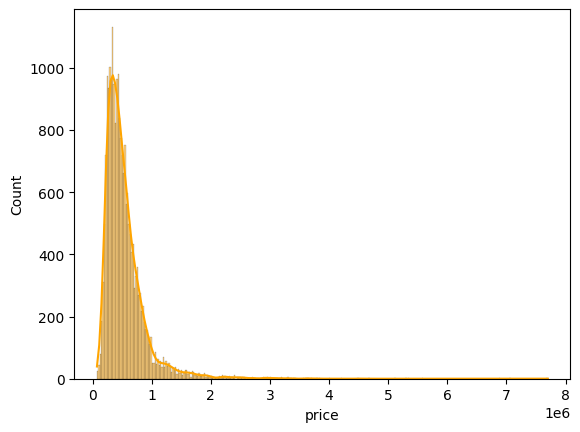

In [19]:
sns.histplot(df["price"], color='orange', kde=True);

### Outliers

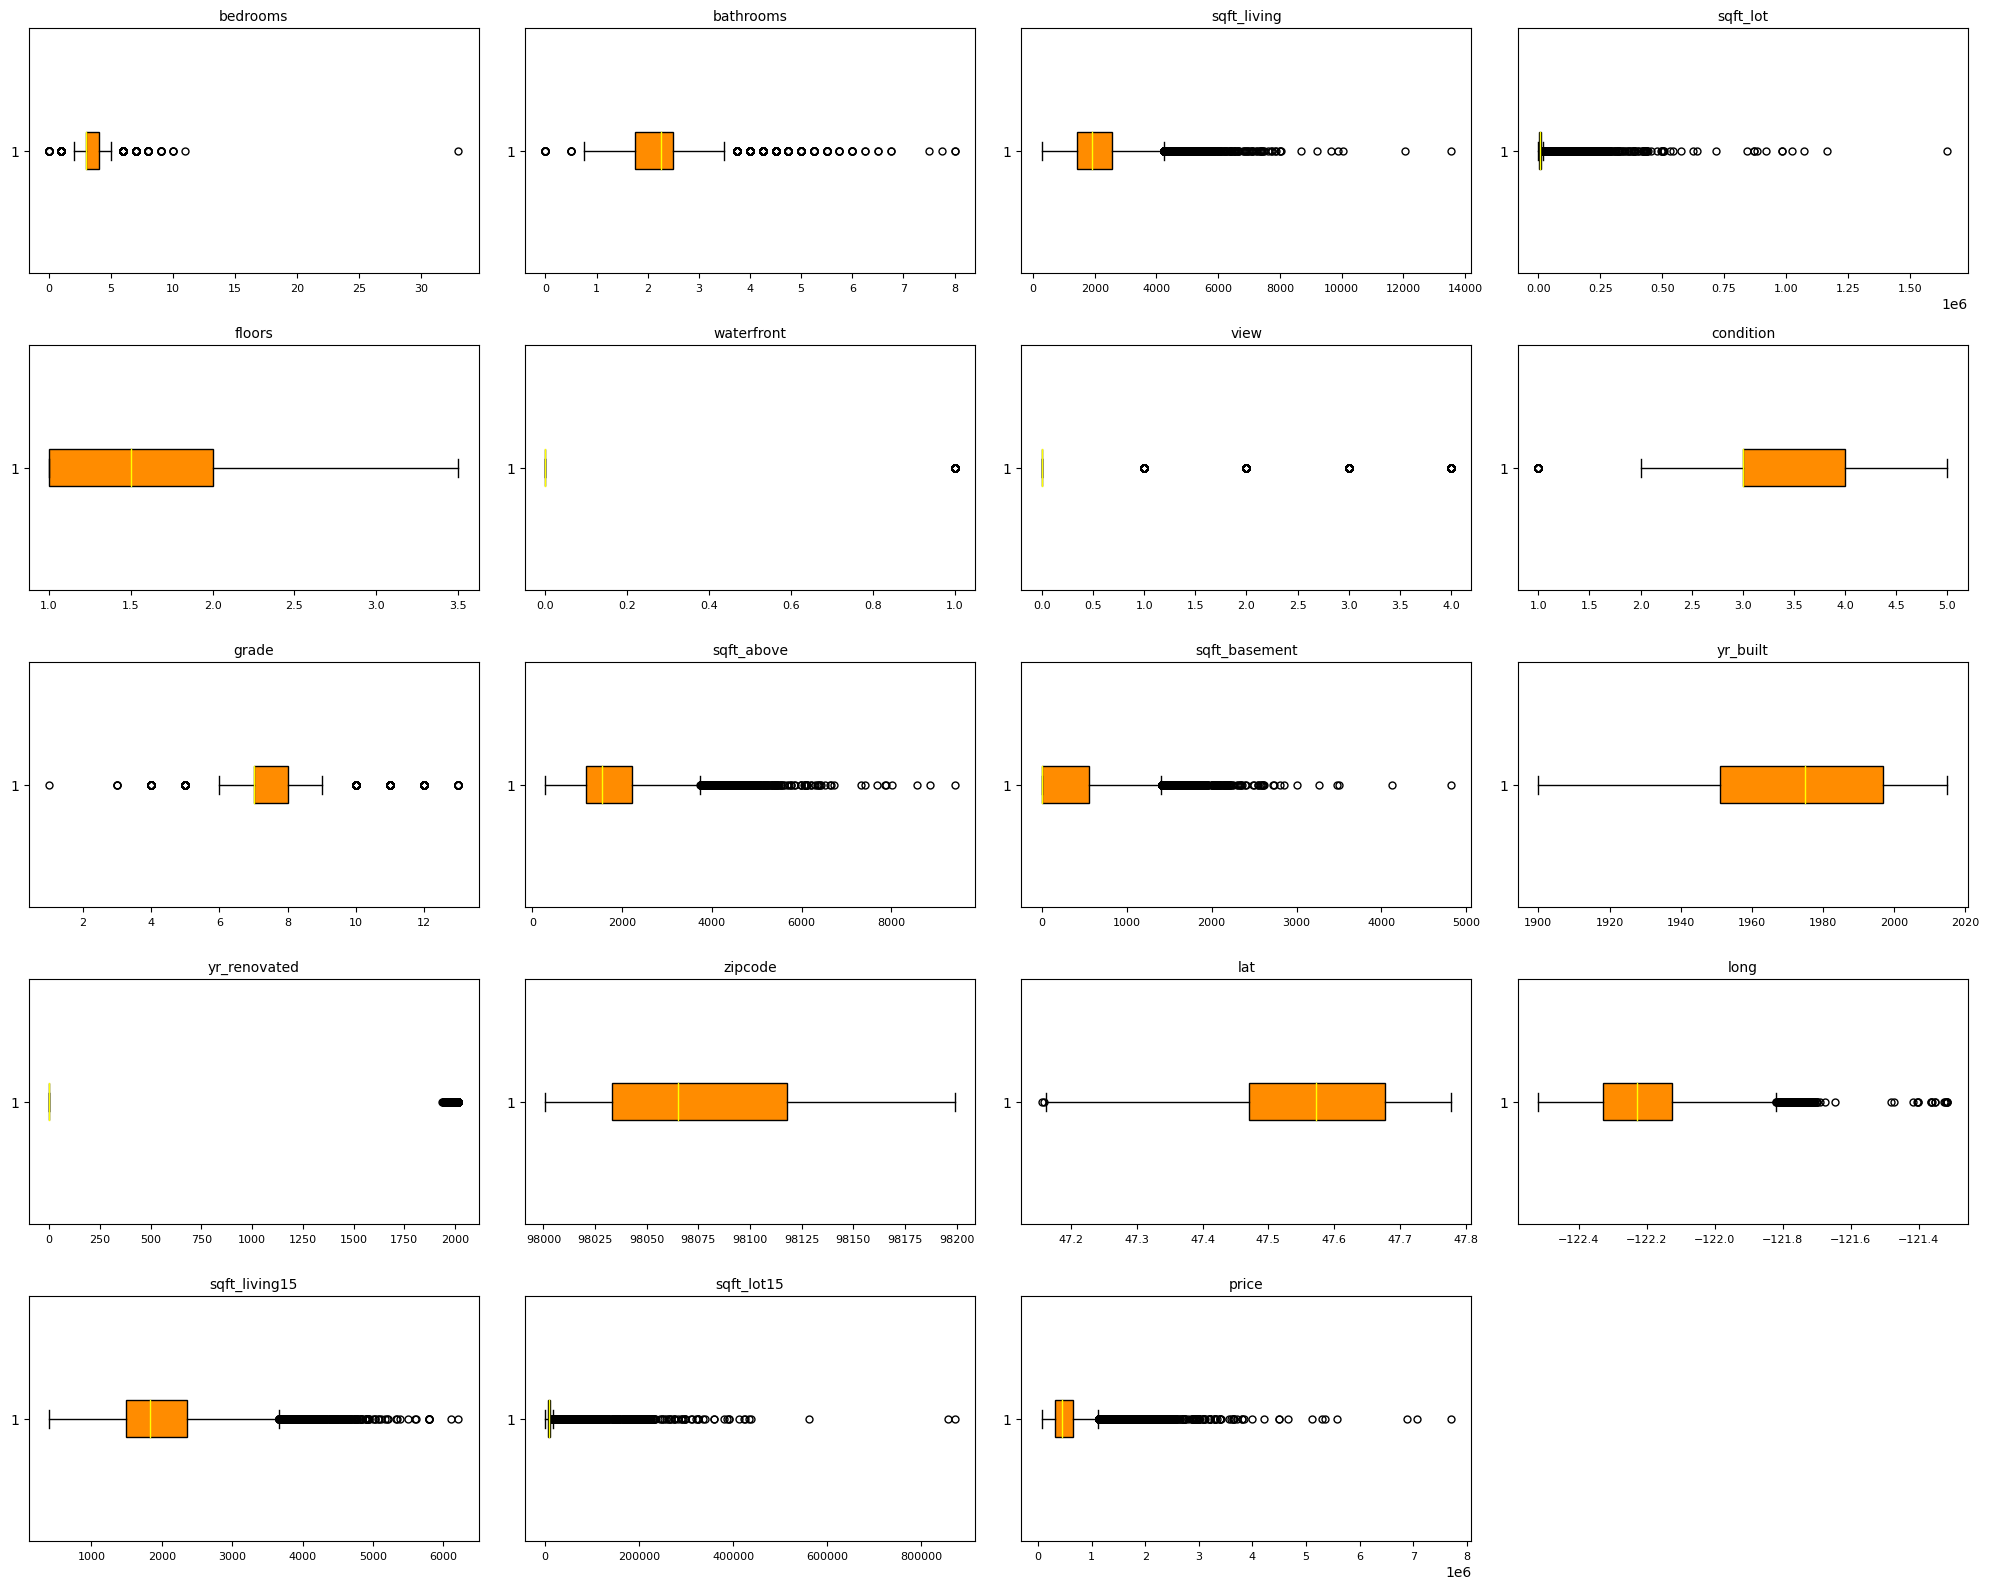

In [20]:
# Example color
color = '#FF8C00'

# Grid size
nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()

# Columns excluding the date column
columns = [col for col in df.columns if df[col].dtype != 'datetime64[ns]']

# Ensure columns are numeric
numeric_columns = []
for col in columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        numeric_columns.append(col)
    else:
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            numeric_columns.append(col)
        except ValueError:
            pass

for i, ax in enumerate(axes):
    if i >= len(numeric_columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df[numeric_columns[i]].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(numeric_columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

# Correlations

In [21]:
# Numerical columns:
num = df.select_dtypes(include='number')

In [22]:
num.corrwith(df["price"]).sort_values(ascending=False) # Correlation with the target

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
dtype: float64

In [23]:
num_corr = round(df.corr(), 2)

## Heatmap

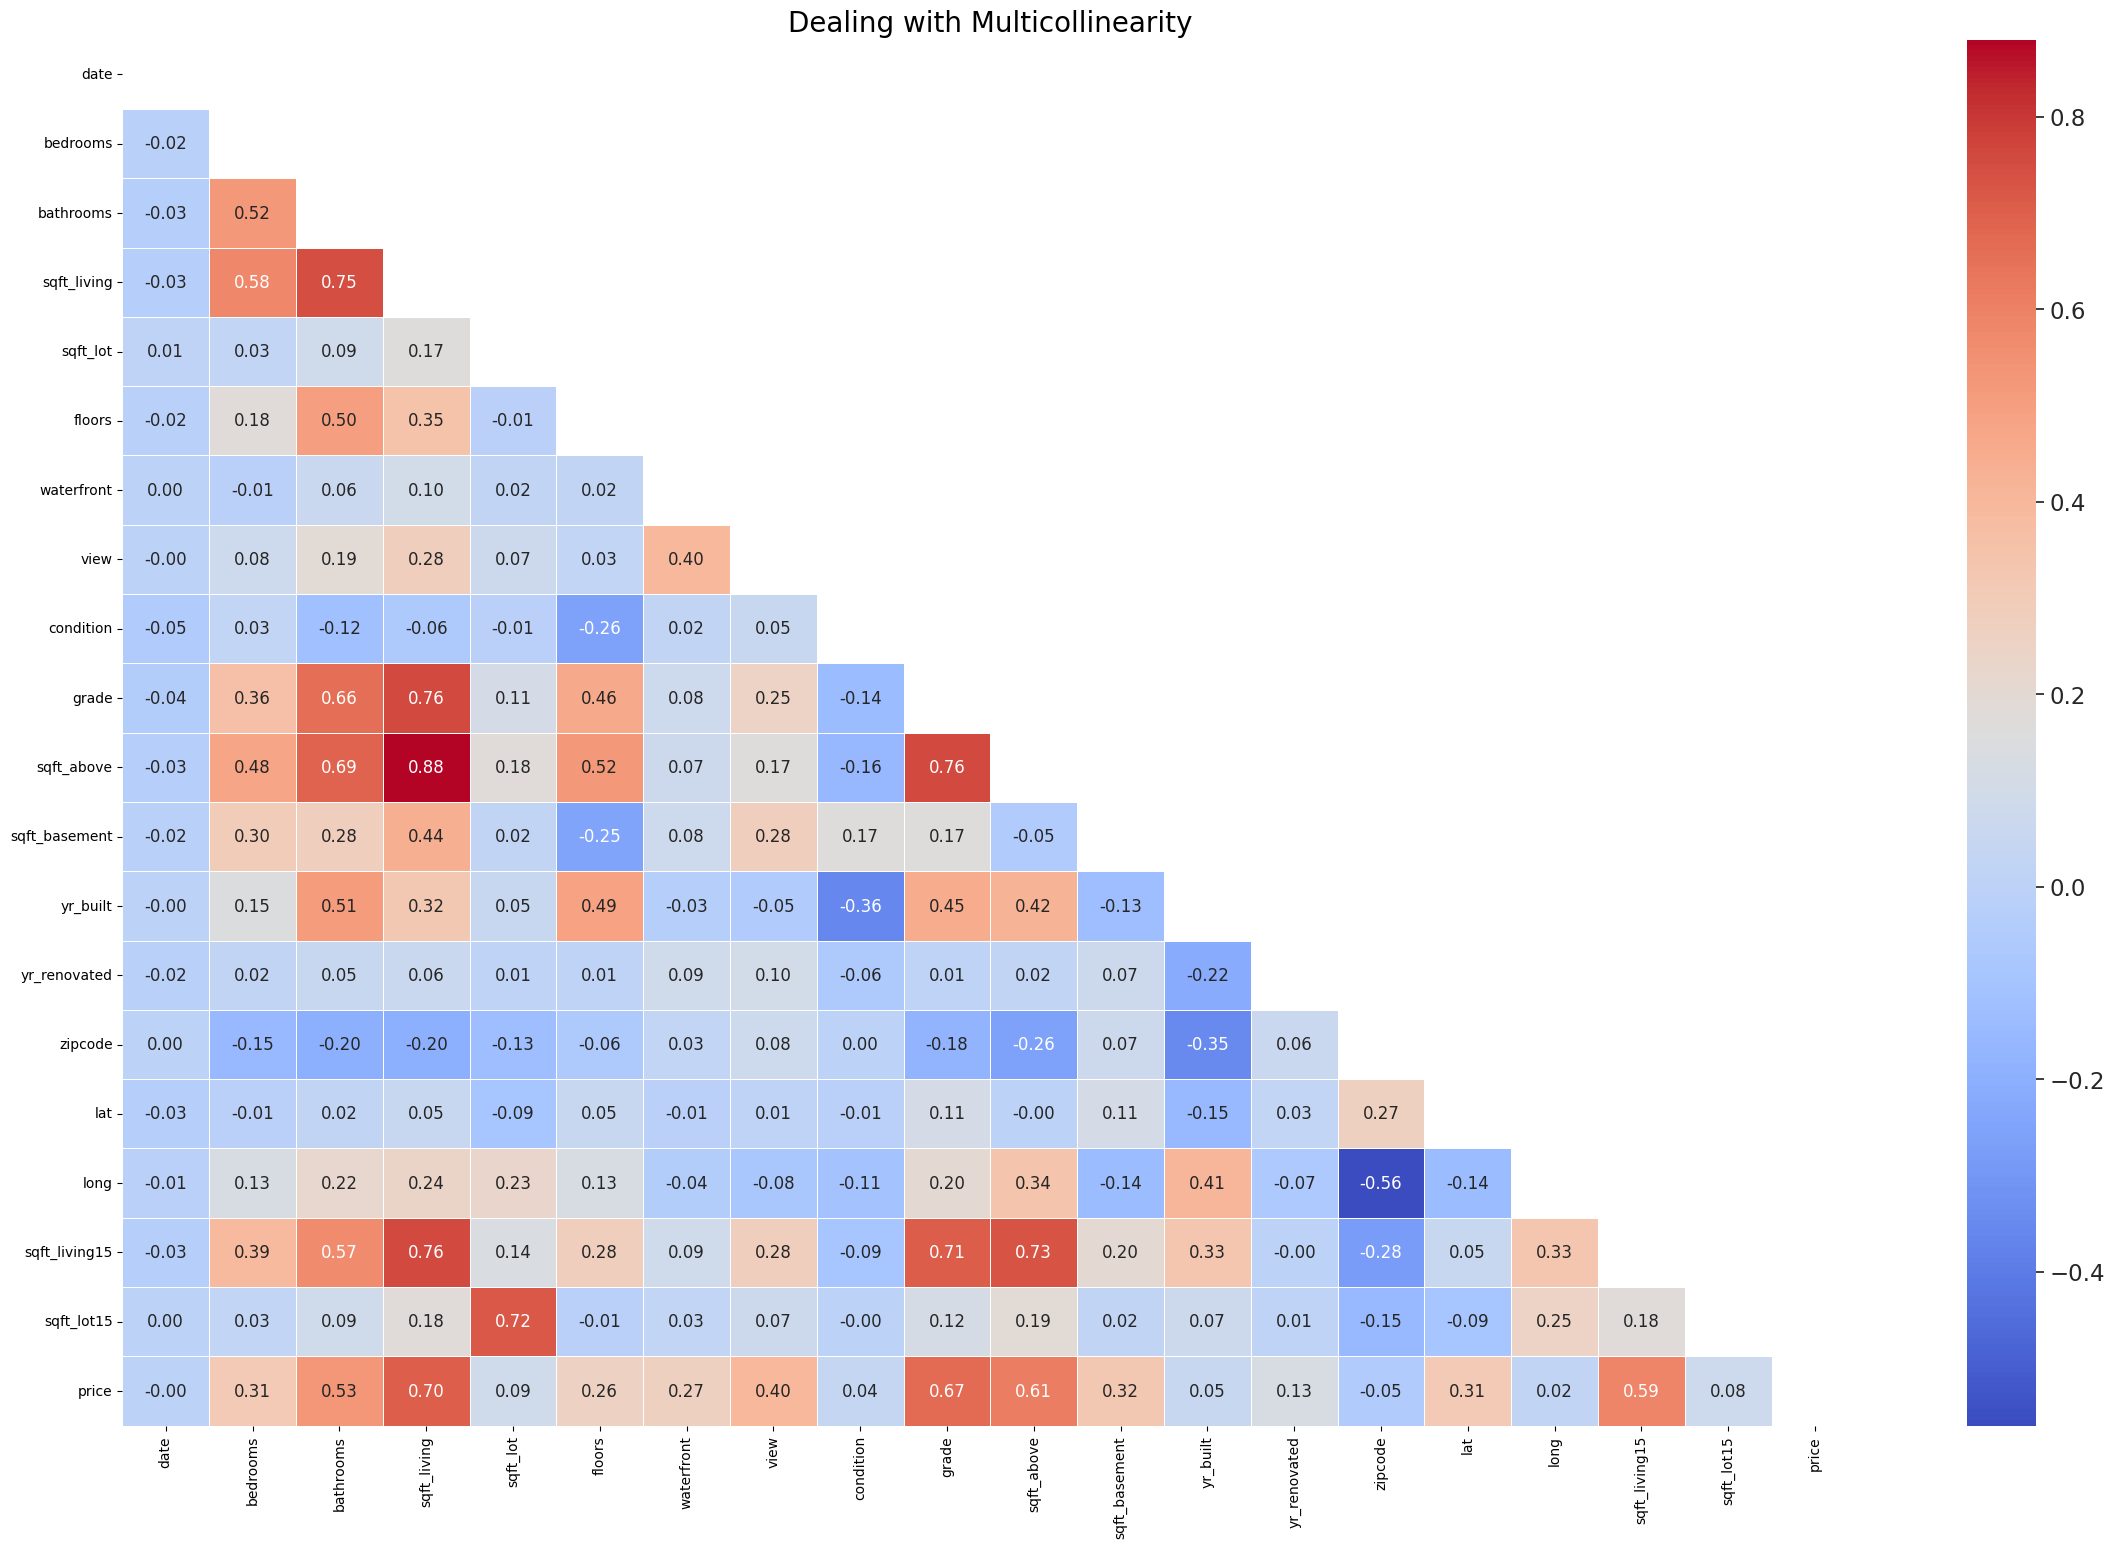

In [24]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(28, 18))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

## Heatmap Conclusions

* The highest correlations are `sqft_living` and `sqft_above`.
* However, in respect to the target `price`,
the correlation is below 0.8.
* Thus, I believe that removing one column is not a major improvement.
* Therefore, I prefer keeping all columns and not removing any column as there are none between 0.8-0.9 correaltion.


# Data Preprocessing

In [25]:
# Dataset with no date to run models:
fixed_df = df.drop(columns='date')

In [26]:
X = fixed_df.drop("price", axis=1)
y = df["price"]

# Modeling

## Train-Test Split

In [27]:
# Using 70-30 split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 21613.
70% for training data: 15129.
30% for test data: 6484.


## Model 1: Linear Regression

In [29]:
# Import Linear Regreassion model:
from sklearn.linear_model import LinearRegression

In [30]:
# Create linear regression model:
linear_model = LinearRegression()

In [31]:
# Train model:
linear_model.fit(X_train, y_train)

LinearRegression()

### Linear Validation / Metrics

In [32]:
linear_predictions = linear_model.predict(X_test)

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

linear_r2_3 = r2_score(y_test, linear_predictions)
linear_RMSE_3 = mean_squared_error(y_test, linear_predictions, squared=False)
linear_MSE_3 = mean_squared_error(y_test, linear_predictions)
linear_MAE_3 = mean_absolute_error(y_test, linear_predictions)

In [34]:
# Printing the results for Linear Regression
print("Linear Regression R2 = ", round(linear_r2_3, 4))
print("Linear Regression RMSE = ", round(linear_RMSE_3, 4))
print("Linear Regression MSE =  ", round(linear_MSE_3, 4))
print("Linear Regression MAE = ", round(linear_MAE_3, 4))

Linear Regression R2 =  0.6995
Linear Regression RMSE =  208296.7277
Linear Regression MSE =   43387526779.3553
Linear Regression MAE =  127486.8026


## Model 2: Decision tree

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

### Tree Validation / Metrics

In [37]:
tree_predictions = tree_model.predict(X_test)

In [38]:
tree_R2 = r2_score(y_test, tree_predictions)
tree_RMSE = mean_squared_error(y_test, tree_predictions, squared=False)
tree_MSE = mean_squared_error(y_test, tree_predictions)
tree_MAE = mean_absolute_error(y_test, tree_predictions)

In [39]:
# Printing the results
print("Decision Tree R2 =", round(tree_R2, 4))
print("Decision Tree RMSE =", round(tree_RMSE, 4))
print("Decision Tree MSE =", round(tree_MSE, 4))
print("Decision Tree MAE =", round(tree_MAE, 4))

Decision Tree R2 = 0.7366
Decision Tree RMSE = 194996.9105
Decision Tree MSE = 38023795092.7977
Decision Tree MAE = 100868.8284


## Model 3: Key Nearest Neighbor

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
key_model = KNeighborsRegressor()
key_model.fit(X_train, y_train)

KNeighborsRegressor()

### Key N Validation / Metrics

In [42]:
key_predictions = key_model.predict(X_test)

In [43]:
key_R2 = r2_score(y_test, key_predictions)
key_RMSE = mean_squared_error(y_test, key_predictions, squared=False)
key_MSE = mean_squared_error(y_test, key_predictions)
key_MAE = mean_absolute_error(y_test, key_predictions)

In [44]:
# Printing the results
print("Key N Neighbour R2 =", round(key_R2, 4))
print("Key N Neighbour RMSE =", round(key_RMSE, 4))
print("Key N Neighbour MSE =", round(key_MSE, 4))
print("Key N Neighbour MAE =", round(key_MAE, 4))

Key N Neighbour R2 = 0.4932
Key N Neighbour RMSE = 270495.0558
Key N Neighbour MSE = 73167575226.5868
Key N Neighbour MAE = 164982.8095


# Improving the Model

## Normalization with MinMaxScaler

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_scaled, y_train)

tree_predictions_2 = tree_model.predict(X_test_scaled)

In [49]:
tree_R2_2 = r2_score(y_test, tree_predictions_2)
tree_RMSE_2 = mean_squared_error(y_test, tree_predictions_2, squared=False)
tree_MSE_2 = mean_squared_error(y_test, tree_predictions_2)
tree_MAE_2 = mean_absolute_error(y_test, tree_predictions_2)

In [50]:
# Printing the results
print("Tree Model 2 R2 =", round(tree_R2_2, 4))
print("Tree Model 2 RMSE =", round(tree_RMSE_2, 4))
print("Tree Model 2 MSE =", round(tree_MSE_2, 4))
print("Tree Model 2 MAE =", round(tree_MAE_2, 4))

Tree Model 2 R2 = 0.7386
Tree Model 2 RMSE = 194262.7442
Tree Model 2 MSE = 37738013765.2635
Tree Model 2 MAE = 101625.9621


Comparing Tree model 1 verus tree Model 2

In [51]:
# Printing the results
print("Decision Tree R2 =", round(tree_R2, 4))
print("Decision Tree RMSE =", round(tree_RMSE, 4))
print("Decision Tree MSE =", round(tree_MSE, 4))
print("Decision Tree MAE =", round(tree_MAE, 4))

Decision Tree R2 = 0.7366
Decision Tree RMSE = 194996.9105
Decision Tree MSE = 38023795092.7977
Decision Tree MAE = 100868.8284
